In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import os

In [241]:
path = os.getcwd()
files = os.listdir()
print(files)
data = pd.read_csv(path+'/'+files[5],header = 0)
files

['Lab9_analysis.ipynb', '.ipynb_checkpoints', '.~lock.Lab9_mod_intial.csv#', 'Lab9_raw.csv', 'Figure4-1.png', 'Lab9_mod_intial.csv']


['Lab9_analysis.ipynb',
 '.ipynb_checkpoints',
 '.~lock.Lab9_mod_intial.csv#',
 'Lab9_raw.csv',
 'Figure4-1.png',
 'Lab9_mod_intial.csv']

In [242]:
for i in range(4,12):
    data.loc[i,"DMM2"] /= 1000.
for j in range(len(data)):
    data.loc[j,"ratio"] = data.loc[j,"DMM2"]/data.loc[j,"DMM1"]

In [243]:
data.columns

Index(['FGOV', 'DMM1', 'DMM2', 'micPos', 'PP', 'Frequency ', 'Vzero', 'Pzero',
       'K[data sheet]', 'ratio'],
      dtype='object')

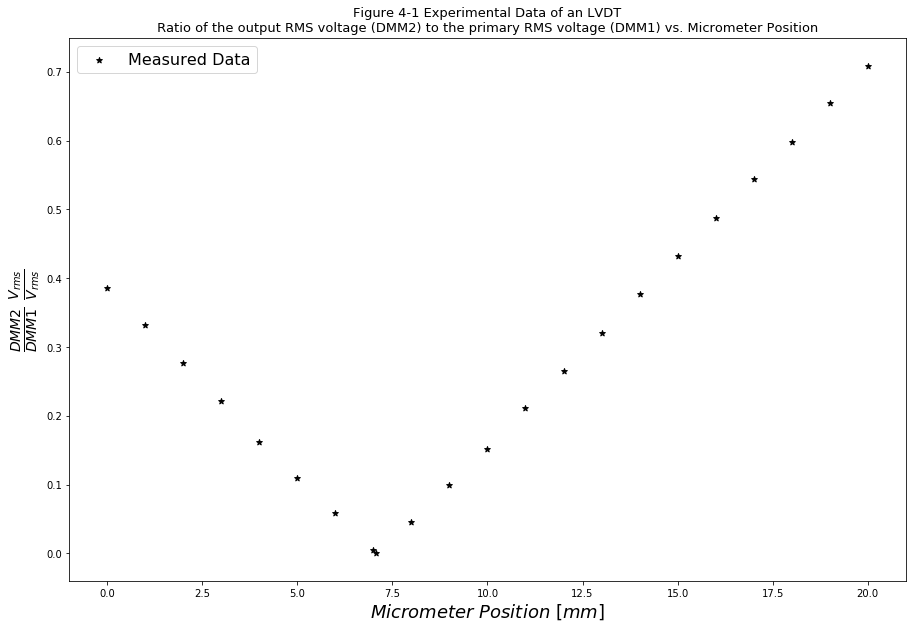

In [244]:
fig1,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.micPos,data.ratio,color = 'black',marker = '*')
ax.set_xlabel(r'$Micrometer$ $Position$ $[mm]$',fontsize = 18)
ax.set_ylabel(r'$\frac {DMM2}{DMM1}$ $\frac{V_{rms}}{V_{rms}}$',fontsize = 20)
plotList = ['Measured Data']
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
ax.set_title('Figure 4-1 Experimental Data of an LVDT\n Ratio of the output RMS voltage (DMM2)' \
             +' to the primary RMS voltage (DMM1) vs. Micrometer Position ',fontsize = 13)
fig1.savefig('Figure4-1.png')

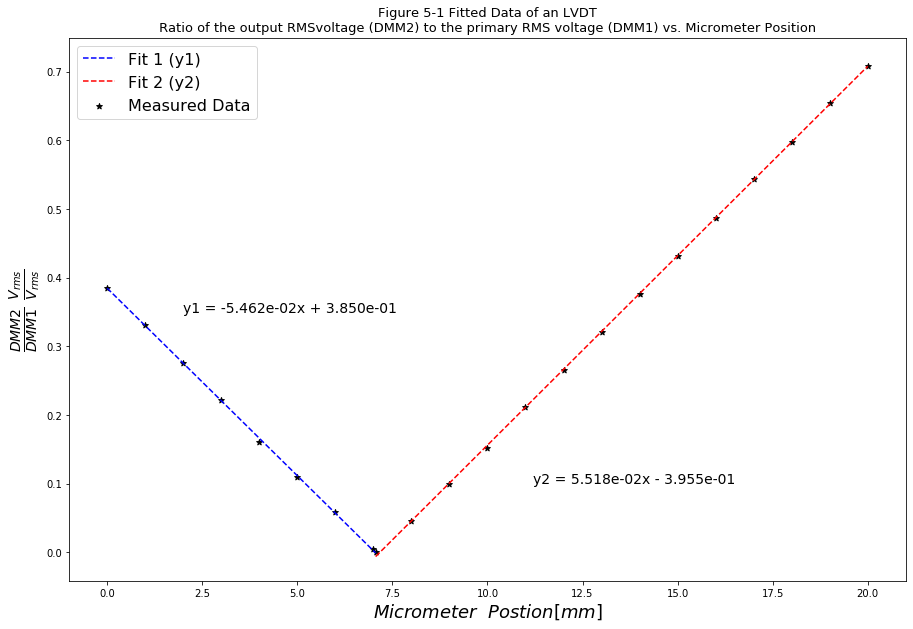

In [248]:
fig2,ax = plt.subplots(figsize = [15,10])
ax.scatter(data.micPos,data.ratio,color = 'black',marker = '*')
ax.set_xlabel(r'$Micrometer$  $Postion [mm]$',fontsize = 18)
ax.set_ylabel(r'$\frac {DMM2}{DMM1}$ $\frac{V_{rms}}{V_{rms}}$',fontsize=20)
p1 = np.polyfit(data.micPos[0:9],data.ratio[0:9],1)
fit1 = np.polyval(p1,data.micPos[0:9])
ax.plot(data.micPos[0:9],fit1,linestyle = '--',color = 'blue')
p2 = np.polyfit(data.micPos[8:22],data.ratio[8:22],1)
fit2 = np.polyval(p2,data.micPos[8:22])
ax.plot(data.micPos[8:22],fit2,linestyle = '--',color = 'red')
ax.set_title('Figure 5-1 Fitted Data of an LVDT\n Ratio of the output RMS' \
             +'voltage (DMM2) to the primary RMS voltage (DMM1) vs. Micrometer Position ',fontsize = 13)
txt1 = 'y1 = %.3ex'%p1[0]+' + %.3e'%p1[1]
ax.text(2,.35,txt1,fontsize = 14)
txt2 = 'y2 = %.3ex'%p2[0]+' - %.3e'%abs(p2[1])
ax.text(11.2,.1,txt2,fontsize = 14)
plotList = ['Fit 1 (y1)','Fit 2 (y2)','Measured Data']
ax.legend(plotList,loc = 'upper left',prop={'size': 16})
fig2.savefig('Figure5-1.png')